<a href="https://colab.research.google.com/github/FMagnani/Physics_Informed_NeuralNetwork/blob/main/Allen_Cahn_Discrete/Allen_Cahn_Discrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

Cloning GitHub repo 

In [1]:
!git clone https://github.com/FMagnani/Physics_Informed_NeuralNetwork.git

Cloning into 'Physics_Informed_NeuralNetwork'...
remote: Enumerating objects: 799, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 799 (delta 62), reused 90 (delta 39), pack-reused 581
Receiving objects: 100% (799/799), 126.41 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (201/201), done.
Checking out files: 100% (364/364), done.


Move to the directory for the Allen-Cahn discrete time model

In [2]:
cd Physics_Informed_NeuralNetwork/Allen-Cahn_Discrete/

/content/Physics_Informed_NeuralNetwork/Allen-Cahn_Discrete


# Data preparation

Import modules

In [21]:
import numpy as np
import scipy.io
import tensorflow as tf
import matplotlib.pyplot as plt
 
from Allen_Cahn_PINN import Allen_Cahn_PINN
from ACD_plotting import plot_results

import sys
sys.path.insert(0, '../Utils/')
from plotting import plot_Adam_history
from notebook_plotting import plot_results_2steps


Import and prepare data, inizialize PINN

In [22]:
    ###    MAIN    ###
    
# Set random seed
np.random.seed(1234)
tf.random.set_seed(1234)
 
q = 100
layers = [1, 200, 200, 200, 200, q+1]
lb = np.array([-1.0])
ub = np.array([1.0])
    
N = 200
    
data = scipy.io.loadmat('../Data/AC.mat')
    
t = data['tt'].flatten()[:,None] # T x 1
x = data['x'].flatten()[:,None] # N x 1
Exact = np.real(data['uu']).T # T x N
    
idx_t0 = 20
idx_t1 = 180
dt = t[idx_t1] - t[idx_t0]
    
# Initial data
noise_u0 = 0.0
idx_x = np.random.choice(Exact.shape[1], N, replace=False) 
x0 = x[idx_x,:]
u0 = Exact[idx_t0:idx_t0+1,idx_x].T
u0 = u0 + noise_u0*np.std(u0)*np.random.randn(u0.shape[0], u0.shape[1])
    
# Test data
x_star = x
 
# Conversion to tensors    
x0 = tf.convert_to_tensor(x0)
u0 = tf.convert_to_tensor(u0)
x_star = tf.convert_to_tensor(x_star)
 
model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)


#Single step **from t=0.1 to t=0.9**

##Original setting

The setting is the same of the Raissi's paper:  
q = 100  

t0 = 0.1  
t1 = 0.9  


In [24]:
q = 100
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 20
idx_t1 = 180
dt = t[idx_t1] - t[idx_t0]

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (3m 53s)

In [25]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 1000 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:39<00:00, 30.09it/s]


Training time: 99.6931


Prediction (single step 0.1-0.9)

In [26]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 3.774001e-01


Plotting (single step 0.1-0.9)

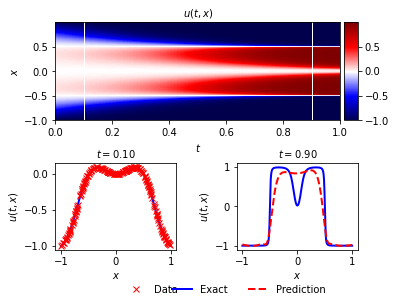

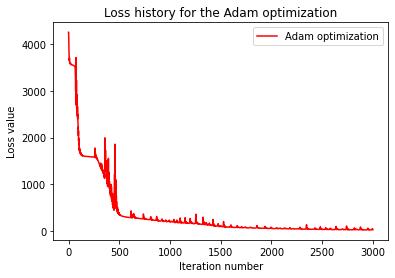

In [27]:
    ###    PLOTTING    ###
 
fig_results = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss, ax = plt.subplots(1,1)
plot_Adam_history(ax, Adam_hist)

##Setting with doubled RK stages

Setting with increased number of RK stages:  
q = 200  

t0 = 0.1  
t1 = 0.9  


In [28]:
q = 200
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 20
idx_t1 = 180
dt = t[idx_t1] - t[idx_t0]

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (4m 6s)

In [29]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 1000 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:41<00:00, 29.57it/s]


Training time: 101.4408


Prediction (single step 0.1-0.9)

In [30]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 4.874145e-01


Plotting (single step 0.1-0.9)

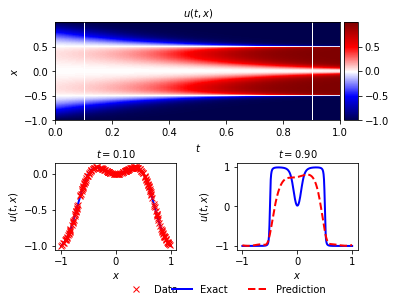

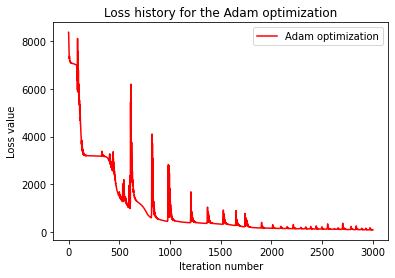

In [31]:
    ###    PLOTTING    ###
 
fig_results = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss, ax = plt.subplots(1,1)
plot_Adam_history(ax, Adam_hist)

##Setting with half of RK stages

Setting with half the original number of RK stages:  
q = 50  

t0 = 0.1  
t1 = 0.9  


In [32]:
q = 50
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 20
idx_t1 = 180
dt = t[idx_t1] - t[idx_t0]

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (3m 44s)

In [33]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 1000 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:38<00:00, 30.34it/s]


Training time: 98.8810


Prediction (single step 0.1-0.9)

In [34]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 3.147204e-01


Plotting (single step 0.1-0.9)

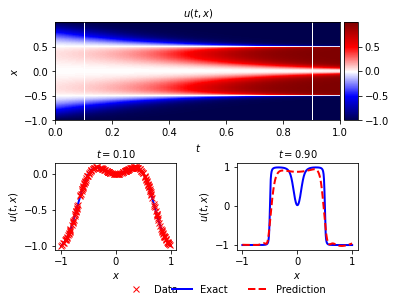

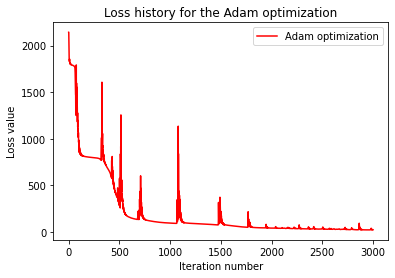

In [35]:
    ###    PLOTTING    ###
 
fig_results = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss, ax = plt.subplots(1,1)
plot_Adam_history(ax, Adam_hist)

# Single steps, **from 0.1 to 0.5** and **from 0.5 to 0.9**

## From 0.1 to 0.5

We set:  
q = 60  
t0 = 0.1  
t1 = 0.5


In [40]:
q = 60
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 20
idx_t1 = 100
dt = t[idx_t1] - t[idx_t0]

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (3m 49s)

In [41]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 1000 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:39<00:00, 30.19it/s]


Training time: 99.3633


Prediction (single step 0.1-0.5)

In [42]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 9.393156e-02


Plotting (single step 0.1-0.5)

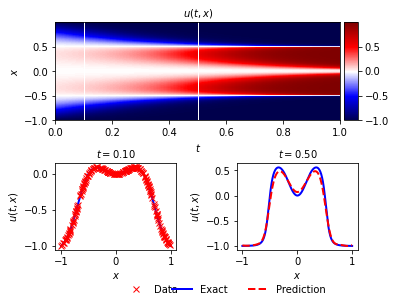

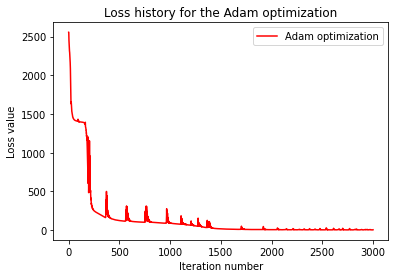

In [43]:
    ###    PLOTTING    ###
 
fig_result_1 = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss_1, ax1 = plt.subplots(1,1)
plot_Adam_history(ax1, Adam_hist)

##From 0.5 to 0.9

We set:  
q = 60  
t0 = 0.5  
t1 = 0.9  
The initial conditions are the conditions at time t=0.5.


In [44]:
q = 60
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 100
idx_t1 = 180
dt = t[idx_t1] - t[idx_t0]

u0 = Exact[idx_t0:idx_t0+1,idx_x].T
u0 = tf.convert_to_tensor(u0)

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (3m 48s)

In [46]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 1000 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:39<00:00, 30.02it/s]


Training time: 99.9313


Prediction (single step 0.5-0.9)

In [47]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 1.484395e-01


Plotting (single step 0.5-0.9)

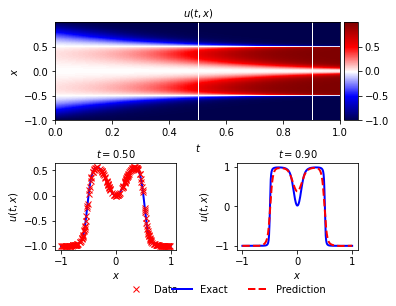

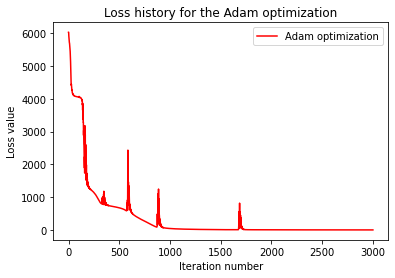

In [48]:
    ###    PLOTTING    ###
 
fig_result_1 = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss_1, ax1 = plt.subplots(1,1)
plot_Adam_history(ax1, Adam_hist)

# Double step **from 0.1 to 0.5 to 0.9**

## First time step

We set:  
q = 50  
t0 = 0.1  
t1 = 0.5


In [60]:
q = 50
layers = [1, 200, 200, 200, 200, q+1]

idx_t0 = 20
idx_t1 = 100
dt = t[idx_t1] - t[idx_t0]

u0 = Exact[idx_t0:idx_t0+1,idx_x].T
u0 = tf.convert_to_tensor(u0)

model = Allen_Cahn_PINN(x0, u0, layers, dt, lb, ub, q)

Training (2m 40s)

In [61]:
    ###    TRAINING    ###
 
adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 500 # Max iterations for lbfgs
 
Adam_hist = model.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:38<00:00, 30.57it/s]


Training time: 98.1307


Prediction (first step)

In [62]:
    ###    PREDICTION    ###
 
U1_pred = model.predict(x_star)
 
error = np.linalg.norm(U1_pred[:,-1] - Exact[idx_t1,:], 2)/np.linalg.norm(Exact[idx_t1,:], 2)
print('Error: %e' % (error))

Error: 8.461808e-02


Plotting (first step)

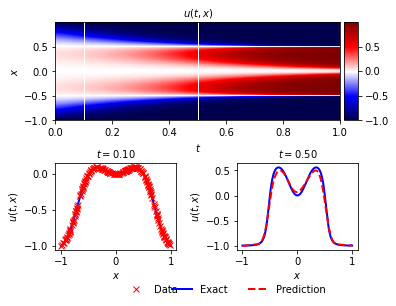

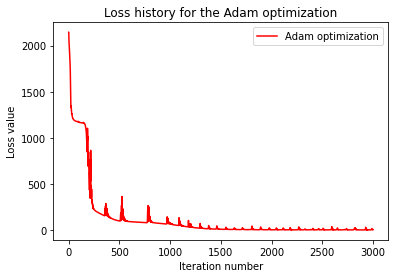

In [63]:
    ###    PLOTTING    ###
 
fig_result_1 = plot_results(U1_pred, Exact,t,x_star,x,idx_t0,idx_t1,x0,u0,lb,ub)
 
fig_loss_1, ax1 = plt.subplots(1,1)
plot_Adam_history(ax1, Adam_hist)

## Second time step

The predictions from the previous time step are employed as the initial conditions of the next time step.  
The other parameters keeps unchanged.

In [77]:
idx_t1 = 100
idx_t2 = 180
dt = t[idx_t2] - t[idx_t1]

u0_1 = U1_pred[:,-1:].numpy()[idx_x,:]
u0_1 = tf.convert_to_tensor(u0_1)

model_1 = Allen_Cahn_PINN(x0, u0_1, layers, dt, lb, ub, q)


Training (2m 41s) 

In [78]:
    ###    TRAINING    ###

adam_iterations = 3000      # Number of training steps 
lbfgs_max_iterations = 500 # Max iterations for lbfgs
 
Adam_hist = model_1.train(adam_iterations, lbfgs_max_iterations)

100%|██████████| 3000/3000 [01:39<00:00, 30.13it/s]


Training time: 99.5614


Prediction (second step)

In [79]:
    ###    PREDICTION    ###
 
U2_pred = model_1.predict(x_star)
 
error = np.linalg.norm(U2_pred[:, -1:] - Exact[idx_t2,:], 2)/np.linalg.norm(Exact[idx_t2,:], 2)
print('Error: %e' % (error))

Error: 2.249824e+01


Plotting (second step)

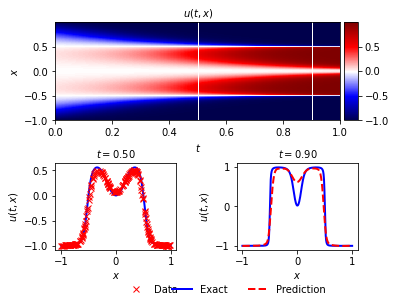

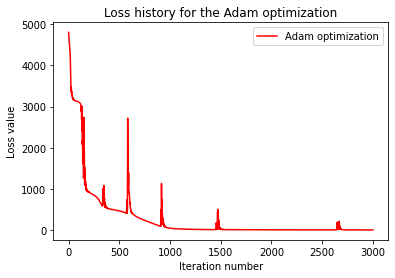

In [80]:
    ###    PLOTTING    ###
 
fig_result_2 = plot_results(U2_pred, Exact,t,x_star,x,idx_t1,idx_t2,x0,u0_1,lb,ub)
 
fig_loss_2, ax2 = plt.subplots(1,1)
plot_Adam_history(ax2, Adam_hist)

## Final results

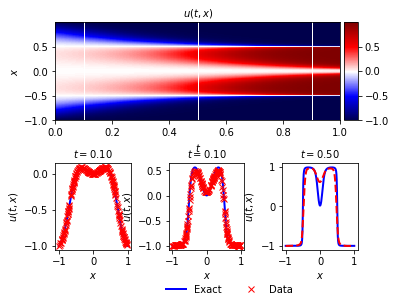

In [86]:
idx_t0 = 20
idx_t1 = 100
idx_t2 = 180

fig_final = plot_results_2steps(u0_1,idx_t1,
                                U2_pred[:,-1],idx_t2,
                                u0,idx_t0,x0,
                                Exact,x,t,lb,ub,x_star)

Save figures

In [ ]:
format = 'png'

fig_final.savefig('results_final'+format)


Save weights

In [ ]:
model.model.save_weights('Allen_Cahn_2steps')